# Clustering

## Importing Needed packages

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## Load Data From CSV File

In [62]:
df = pd.read_csv("Customer.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Exploration

In [63]:
# summarize the data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Data pre-processing

In [64]:
gender = {"Gender":{'Female': 1,'Male': 0}}
df.replace(gender , inplace = True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


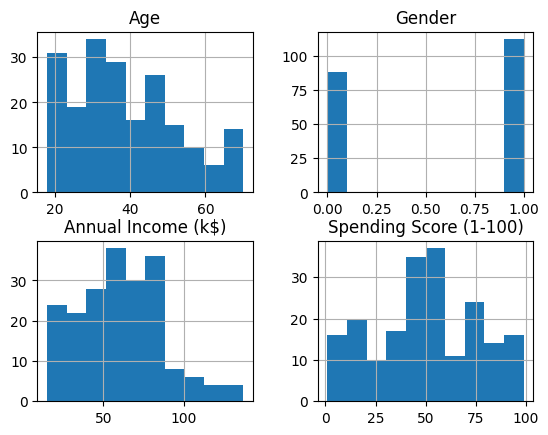

In [77]:
cdf = df[['Age','Gender','Annual Income (k$)','Spending Score (1-100)']]
viz = cdf
viz.hist()
plt.show()

Now, let's plot each of these features against the Annual Income (k$), to see how linear their relationship is:

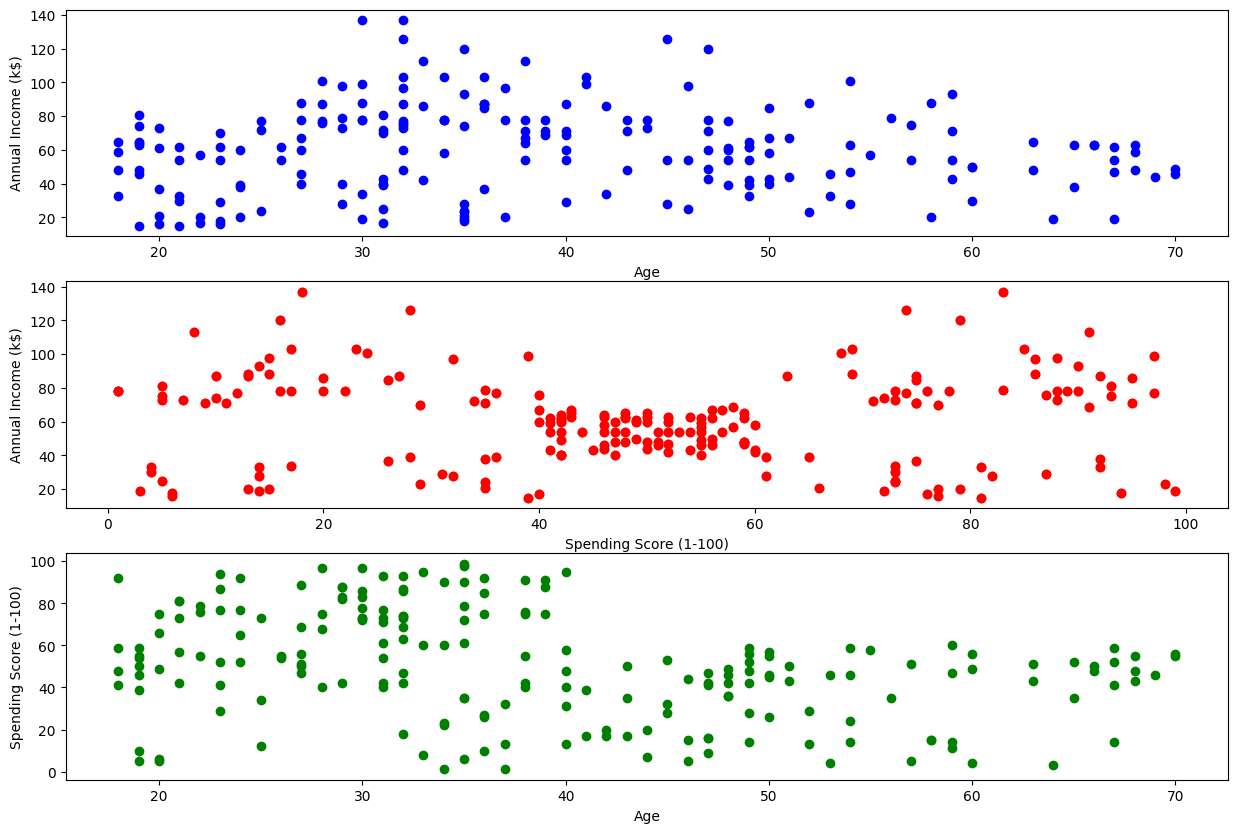

In [78]:
fig, axs = plt.subplots(3,1,figsize=(15,10), sharey='row')
ax1,ax2, ax3 = axs

ax1.scatter(cdf.Age, cdf['Annual Income (k$)'],  color='blue')
ax1.set_xlabel("Age")
ax1.set_ylabel("Annual Income (k$)")

ax2.scatter(cdf['Spending Score (1-100)'], cdf['Annual Income (k$)'],  color='red')
ax2.set_xlabel("Spending Score (1-100)")
ax2.set_ylabel("Annual Income (k$)")

ax2.scatter(cdf['Spending Score (1-100)'], cdf['Annual Income (k$)'],  color='red')
ax2.set_xlabel("Spending Score (1-100)")
ax2.set_ylabel("Annual Income (k$)")

ax3.scatter(cdf.Age, cdf['Spending Score (1-100)'],  color='green')
ax3.set_xlabel("Age")
ax3.set_ylabel("Spending Score (1-100)")

plt.show()


## Customer Segmentation with K-Means

### Normalizing over the standard deviation

In [79]:
X = df.values
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[-1.7234121 , -1.12815215, -1.42456879, -1.73899919, -0.43480148,
         1.28170603],
       [-1.70609137, -1.12815215, -1.28103541, -1.73899919,  1.19570407,
         1.28170603],
       [-1.68877065,  0.88640526, -1.3528021 , -1.70082976, -1.71591298,
         1.28170603],
       ...,
       [ 1.68877065, -1.12815215, -0.49160182,  2.49780745,  0.92395314,
         0.04929639],
       [ 1.70609137, -1.12815215, -0.49160182,  2.91767117, -1.25005425,
         0.04929639],
       [ 1.7234121 , -1.12815215, -0.6351352 ,  2.91767117,  1.27334719,
         0.04929639]])

## Modeling

In [80]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Insights

In [81]:
df["Clus_km"] = labels
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km
0,1,0,19,15,39,2
1,2,0,21,15,81,2
2,3,1,20,16,6,2
3,4,1,23,16,77,2
4,5,1,31,17,40,2


In [82]:
df.groupby('Clus_km').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clus_km,,,,,
0,96.985915,0.535211,43.197183,59.352113,50.591549
1,166.500000,0.544118,36.044118,88.911765,50.205882
2,31.016393,0.606557,36.918033,30.360656,49.737705


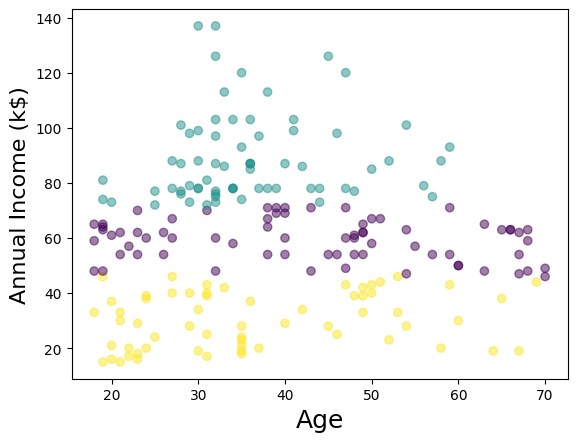

In [83]:
plt.scatter(X[:, 2], X[:, 3], c=labels, alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Annual Income (k$)', fontsize=16)
plt.show()